# Data Cleaning

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [48]:
df = pd.read_csv('data/kc_house_data.csv')
#df.info()

# 1. Converting column dtypes

In [49]:
# converting date column from str to int
df['date'] = pd.to_datetime(df['date']).dt.year
#df.info()

In [50]:
#extracting zip code from address and converting to int
df['zipcode'] = df['address'].str.extract(r'\b(\d{5})[,]\s*United States\b').astype('int')

# 2. Filtering out rows not in King County

In [51]:
df.drop_duplicates(inplace=True)
#df.info()

In [52]:
#filtering out adresses not in Washington
df_wash = df[df['address'].str.contains('Washington')]
#df.info()

In [53]:
df_king = df_wash[(df_wash['lat'] >= 46.71) 
                       & (df['lat'] <= 48.31) 
                       & (df['long'] >= -123.07) 
                       & (df['long'] <= -119.90)]
#df_king.info()

#### URL for King County Coordinate info
[King County Coordinates and Zipcode info](https://www5.kingcounty.gov/sdc/FGDCDocs/ZIPCODE_fgdc.htm)

# 3. Looking at heatmap of new dataset 

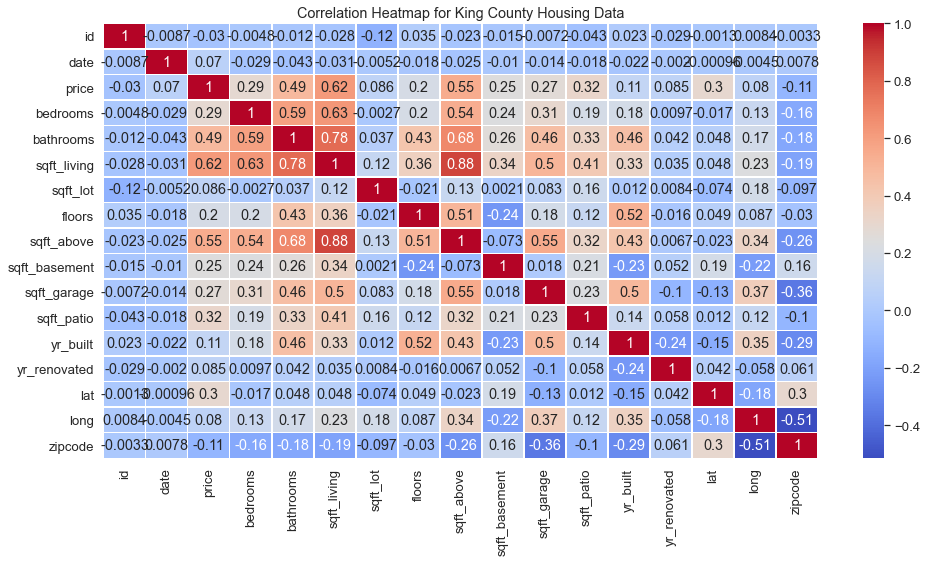

In [43]:
corr_matrix = df_king.corr(method='pearson')

sns.set(font_scale=1.2)
plt.figure(figsize=(16,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap for King County Housing Data")
plt.show()

# 4. looking at the different features

In [169]:
#df_view_2 = df_view[(df_view['sqft_lot'] >= 7000) & (df_view['sqft_lot'] <= 12000)]

In [17]:
#df_king['price'].plot(kind='box')

In [18]:
#df_king_out = df_view.loc[df_view['price'] <= 1882000]
#df_king_out.info()

In [19]:
#df_king_out['price'].plot(kind='box')

In [20]:
#df_view_no_out['price'].plot(kind='hist', )

### Converting categorical columns to number values....I think this will work?:



In [55]:
#df_king_cats = df_king
# lambda function to extract the first character of each object and convert it to an int.
#extract_num = lambda x: int(x[0])

# Apply the lambda function
#df_king_cats['grade'] = df_king_cats['grade'].apply(extract_num)
#df_king_cats['greenbelt'] = df_king_cats['greenbelt'].apply(extract_num)
#df_king_cats['nuisance'] = df_king_cats['nuisance'].apply(extract_num)
#df_king_cats['view'] = df_king_cats['view'].apply(extract_num)
#df_king_cats['condition'] = df_king_cats['condition'].apply(extract_num)
#df_king_cats['heat_source'] = df_king_cats['heat_source'].apply(extract_num)
#df_king_cats['sewer_system'] = df_king_cats['sewer_system'].apply(extract_num)

## Categorizing columns in an effort to split up the data

In [ ]:
 0   id             30155 non-null  int64  #primary key
 2   price          30155 non-null  float64 #our data analysis target metric
    
 1   date           30155 non-null  object #date house sold (time)
 20  yr_built       30155 non-null  int64  # Year when house was built (time/constant)
 21  yr_renovated   30155 non-null  int64  # year when house was renovated (time/constant)

 8   waterfront     30155 non-null  object # Whether the house is on a waterfront (location/constant) (bool)
 9   greenbelt      30155 non-null  object # Whether the house is adjacent to a green belt (location/constant) (bool)
 10  nuisance       30155 non-null  object # Whether the house has traffic noise or other recorded nuisances (location/constant) (bool)
 11  view           30155 non-null  object # Quality of view from house (location/constant) (categorical)
 22  address        30155 non-null  object # address of house (location/constant) (categorical)
 23  lat            30155 non-null  float64 #lattitude coordinate (location/constant)
 24  long           30155 non-null  float64 #longitude coordinate (location/constant)    
    
 6   sqft_lot       30155 non-null  int64  # Square footage of the lot (feature/constant)   
 15  sewer_system   30141 non-null  object # Sewer system for the house (feature/constant) Note: could change but not rly
       
 3   bedrooms       30155 non-null  int64  # number of bedrooms (feature/changeable)
 4   bathrooms      30155 non-null  float64 # number of full and half bathrooms (feature/changeable)
 7   floors         30154 non-null  float64 # number of floors/levels of house (feature/changeable)
 14  heat_source    30123 non-null  object # Heat source for the house (feature/chageable)
    
 12  condition      30155 non-null  object # How good the overall condition of the house is (descriptive)
 13  grade          30155 non-null  object # Overall grade of the house (descriptive)
       
 16  sqft_above     30155 non-null  int64  # Square footage of house apart from basement (feature)
 17  sqft_basement  30155 non-null  int64  # Square footage of the basement (feature)
 18  sqft_garage    30155 non-null  int64  # Square footage of garage space (feature)
 19  sqft_patio     30155 non-null  int64  # Square footage of outdoor porch or deck space (feature)
 5   sqft_living    30155 non-null  int64  # Square footage of living space in the home (feature)

# %load data/column_names.md
# Column Names and Descriptions for King County Data Set

* `id` - Unique identifier for a house
* `date` - Date house was sold
* `price` - Sale price (prediction target)
* `bedrooms` - Number of bedrooms
* `bathrooms` - Number of bathrooms
* `sqft_living` - Square footage of living space in the home
* `sqft_lot` - Square footage of the lot
* `floors` - Number of floors (levels) in house
* `waterfront` - Whether the house is on a waterfront
  * Includes Duwamish, Elliott Bay, Puget Sound, Lake Union, Ship Canal, Lake Washington, Lake Sammamish, other lake, and river/slough waterfronts
* `greenbelt` - Whether the house is adjacent to a green belt
* `nuisance` - Whether the house has traffic noise or other recorded nuisances
* `view` - Quality of view from house
  * Includes views of Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other
* `condition` - How good the overall condition of the house is. Related to maintenance of house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each condition code
* `grade` - Overall grade of the house. Related to the construction and design of the house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each building grade code
* `heat_source` - Heat source for the house
* `sewer_system` - Sewer system for the house
* `sqft_above` - Square footage of house apart from basement
* `sqft_basement` - Square footage of the basement
* `sqft_garage` - Square footage of garage space
* `sqft_patio` - Square footage of outdoor porch or deck space
* `yr_built` - Year when house was built
* `yr_renovated` - Year when house was renovated
* `address` - The street address
* `lat` - Latitude coordinate
* `long` - Longitude coordinate

Most fields were pulled from the [King County Assessor Data Download](https://info.kingcounty.gov/assessor/DataDownload/default.aspx).

The `address`, `lat`, and `long` fields have been retrieved using a third-party [geocoding API](https://docs.mapbox.com/api/search/geocoding/). In some cases due to missing or incorrectly-entered data from the King County Assessor, this API returned locations outside of King County, WA. If you plan to use the `address`, `lat`, or `long` fields in your modeling, consider identifying outliers prior to including the values in your model.


### Condition Column info:

Relative to age and grade. Coded 1-5.

1 = Poor- Worn out. Repair and overhaul needed on painted surfaces, roofing, plumbing, heating and numerous functional inadequacies. Excessive deferred maintenance and abuse, limited value-in-use, approaching abandonment or major reconstruction; reuse or change in occupancy is imminent. Effective age is near the end of the scale regardless of the actual chronological age.

2 = Fair- Badly worn. Much repair needed. Many items need refinishing or overhauling, deferred maintenance obvious, inadequate building utility and systems all shortening the life expectancy and increasing the effective age.

3 = Average- Some evidence of deferred maintenance and normal obsolescence with age in that a few minor repairs are needed, along with some refinishing. All major components still functional and contributing toward an extended life expectancy. Effective age and utility is standard for like properties of its class and usage.

4 = Good- No obvious maintenance required but neither is everything new. Appearance and utility are above the standard and the overall effective age will be lower than the typical property.

5= Very Good- All items well maintained, many having been overhauled and repaired as they have shown signs of wear, increasing the life expectancy and lowering the effective age with little deterioration or obsolescence evident with a high degree of utility.

### Grade Column Info:

Represents the construction quality of improvements. Grades run from grade 1 to 13. Generally defined as:

1-3 Falls short of minimum building standards. Normally cabin or inferior structure.

4 Generally older, low quality construction. Does not meet code.

5 Low construction costs and workmanship. Small, simple design.

6 Lowest grade currently meeting building code. Low quality materials and simple designs.

7 Average grade of construction and design. Commonly seen in plats and older sub-divisions.

8 Just above average in construction and design. Usually better materials in both the exterior and interior finish work.

9 Better architectural design with extra interior and exterior design and quality.

10 Homes of this quality generally have high quality features. Finish work is better and more design quality is seen in the floor plans. Generally have a larger square footage.

11 Custom design and higher quality finish work with added amenities of solid woods, bathroom fixtures and more luxurious options.

12 Custom design and excellent builders. All materials are of the highest quality and all conveniences are present.

13 Generally custom designed and built. Mansion level. Large amount of highest quality cabinet work, wood trim, marble, entry ways etc.